In [1]:
#8-1 
import numpy as np

def reweight_distribution(original_distribution, tempreature=0.5):
    distribution = np.log(original_distribution)/temperature
    distribution = np.exp(distribution)
    return distribution /np.sum(distribution)

In [2]:
import keras 

path = keras.utils.get_file(
    'nietzsche.txt',
    origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
text=open(path).read().lower()
print('size of text:', len(text))

Using TensorFlow backend.
/home/server1/anaconda3/envs/ksa2020/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/server1/anaconda3/envs/ksa2020/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/server1/anaconda3/envs/ksa2020/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/server1/

size of text: 600893


In [3]:
maxlen = 60 #extract sequence to consist of 60 alphabet form test
step =3

sentences = []
next_chars=[]

for i in range(0,len(text)-maxlen, step):
    sentences.append(text[i:i+maxlen])
    next_chars.append(text[i+maxlen])
    #in this point, Because I wrote wrong spell text[i:maxlen], it makes key error at line 28 

print('number of sequences:',len(sentences))

chars=sorted(list(set(text))) #sort word that have independent meaning  and put in list
print('Unique word:',len(chars))
char_indices=dict((char,chars.index(char)) for char in chars)
print(char_indices)
#make a dictionary which mapping word in list with their index 

print('vectorization...')
x=np.zeros((len(sentences),maxlen,len(chars)), dtype=np.bool)
y=np.zeros((len(sentences),len(chars)),dtype=np.bool)
for i,sentence in enumerate(sentences): #enumerate => check the index in Repetitive
    #print(sentence)
    for t,char in enumerate(sentence):
        #print(t,char)
        #print(char_indices[char])
        x[i,t,char_indices[char]]=1
    y[i,char_indices[next_chars[i]]]=1
#one-hot encodeing for sentences

number of sequences: 200278
Unique word: 57
{'\n': 0, ' ': 1, '!': 2, '"': 3, "'": 4, '(': 5, ')': 6, ',': 7, '-': 8, '.': 9, '0': 10, '1': 11, '2': 12, '3': 13, '4': 14, '5': 15, '6': 16, '7': 17, '8': 18, '9': 19, ':': 20, ';': 21, '=': 22, '?': 23, '[': 24, ']': 25, '_': 26, 'a': 27, 'b': 28, 'c': 29, 'd': 30, 'e': 31, 'f': 32, 'g': 33, 'h': 34, 'i': 35, 'j': 36, 'k': 37, 'l': 38, 'm': 39, 'n': 40, 'o': 41, 'p': 42, 'q': 43, 'r': 44, 's': 45, 't': 46, 'u': 47, 'v': 48, 'w': 49, 'x': 50, 'y': 51, 'z': 52, 'ä': 53, 'æ': 54, 'é': 55, 'ë': 56}
vectorization...


In [4]:
from keras import layers

model=keras.models.Sequential()
model.add(layers.LSTM(128,input_shape=(maxlen,len(chars))))
model.add(layers.Dense(len(chars),activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
optimizer=keras.optimizers.RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy',optimizer=optimizer)

In [6]:
def sample(preds, temperature=1.0):
    preds=np.asarray(preds).astype('float64')
    preds=np.log(preds)/temperature
    exp_preds=np.exp(preds)
    preds=exp_preds/np.sum(exp_preds)
    probas= np.random.multinomial(1,preds,1)
    return np.argmax(probas)

In [28]:
import random
import sys

random.seed(42)
start_index = random.randint(0, len(text)-maxlen-1)
loss=[]


for epoch in range(1,60) :
    print('epoch:', epoch)
    history=model.fit(x,y,batch_size=128,epochs=1)
    his_loss=history.history['loss']
    loss.append(his_loss[0])
    print('loss list:',loss)
    seed_text = text[start_index: start_index+maxlen]
    print('----seed text:"'+seed_text+'"')
    
    for temperature in [0.2,0.5,1.0,1.2]:
        print('----temperature:',temperature)
        generated_text=seed_text
        sys.stdout.write(generated_text)
        
        for i in range(400):
            sampled = np.zeros((1,maxlen,len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0,t,char_indices[char]]=1.
            
            preds=model.predict(sampled, verbose=0)[0]
            next_index=sample(preds, temperature)
            next_char=chars[next_index]
            
            generated_text+=next_char
            generated_text=generated_text[1:]
            
            sys.stdout.write(next_char)
            sys.stdout.flush()
            
        print()

epoch: 1
Epoch 1/1
200278/200278 [==============================] - 53s 264us/step - loss: 1.3118
loss list: [1.3117568504496178]
----seed text:"the slowly ascending ranks and classes, in which,
through fo"
----temperature: 0.2
the slowly ascending ranks and classes, in which,
through formerly and self same the science of the most condure of the protection of the world of such an all the world of the profound understand the protection of the strange of the present the being and and the world in the protection of the world and somethint and in the most of the scientific of the protection of the state of the strength of the most whole are the will the being the protection of the se
----temperature: 0.5
the slowly ascending ranks and classes, in which,
through formerly contraise of the conscient avosed to really comparis of the discovered the invention, as the means of the conditions of the variety for the science in
so darkers of the process of the future. the religious the scientific wo

/home/server1/anaconda3/envs/ksa2020/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


nollocher, at an inmost
so herreadenees its ostrant: they were for the rebast in sense developed with commany might wnew
probably in necessary--as in an elevation have no great will be insistual delivers
and inspires morality;
a blonoc of mantle knows,
supirsial termitusy this anders which therefore, by the traced capers of same-yestely with the a n
----temperature: 1.2
the slowly ascending ranks and classes, in which,
through formord
about by lexaban was of that with it has wise! every feelings, i reagel"
exaded outary;
there venermen uproo
xint reasge off will, and like the way: well
to their perhapiousy
of shuving," with our quith other: thebod into occasion, less overtyoker in mestfrieving be bastorness and proxulte perhapssow and inise to lithinely
contrary that in the nature is europe,
somedogably, feignulors--and t
epoch: 2
Epoch 1/1
200278/200278 [==============================] - 53s 263us/step - loss: 1.3047
loss list: [1.3117568504496178, 1.3047181502381757]
----seed text:"t

through formel, as he as one musn.


133réther one is to be conscience of the men as a very thought of the most continued, by a sort of the scientific time in the consequently and self-platoness, here is to remain the sense of the old
same time to see to the emotion in order to have even the price and almost another have prompan said the conscience with every thinked his perceived the good exception and mas
----temperature: 1.0
the slowly ascending ranks and classes, in which,
through for the reaca: longer philosophy of un. but as strangance is to say, a yet
prose at idea, is characterised. also grow cald to a spirit be
una evil fatherng or mandousm, but who else, loing-lems an neighbour. any upon these is its moral higher unweaken of good to ass" during very danger, and in the low in. it was unpect to chey was attent, by men, irrecignt mentively onvey.


ivpis. these that beside
----temperature: 1.2
the slowly ascending ranks and classes, in which,
through forgetches harrvetical fas, 

through fort are there and the german sign(or in the most to god: a fllusions the bad trigher of the lare immes of the interout of the excession of the love a man aleas to who interousd the counter of the debacks and sunderness of a pws the read of the for the are thor conscience of the seem the prestance fforne one solteneme i sumes of the lars not to has of the sopecially with the prestrincical conscience
----temperature: 1.0
the slowly ascending ranks and classes, in which,
through fort woudary of the weaker objects. that hish; the and son san
word, the's opinion, fneanity endure? and the necestion from still sole, even also, whit be
knowly of the conscice, theiry is not and the frien arising in my and tom despoinial and the now has sen is a enge for the bacy he prike
spirites of the ceasily to pootion of the degere, of men in the let téy",
"gener offoint,
brats the sen that n
----temperature: 1.2
the slowly ascending ranks and classes, in which,
through fouth and natess wed ne le n

through for a i r i a an iti anästacy ies ao a  hatwbe a t0 te a ann  e ea   inae he tänes aaä ti uoxn i t ae o tme teanaeso i bae atak t a ig a6 aek we he a  ho ina o8 an h a daäoa i  a  ayhe'"de athe oane e3ts t ertz0 thi c=eeat0yet  eliseno nde ins ti tiee arlaa   ana  e t oi  ho dhe be  r twea æuaä   thhes an a he reera o a a teo hae o a ui tw a  ht a= a  ot  an    an i  moe a t9 or ano d oa a t  aa aa 
----temperature: 0.5
the slowly ascending ranks and classes, in which,
through for ti i i[e e t anna pe tare oa a  ssh oe ea a o d a ho  eae i te a h i ij rere  kea wahe os oa e"osea or t ra s aes  hea  aa i  i iv tsar ip e d a"a-fo'n a ean pe niy aae an se  oopnr i tat a a a oea aä  a e tiænt apd ae a e  oo na er heiänea ina  asif a atäer an ae wi aithe iwbeo ap aeahela as t9te5 aew  ir ol c o3l  'le ere e ac  a i  e  a on oa o sthe e e l  iare e . yseai tn tob a   aen aere a
----temperature: 1.0
the slowly ascending ranks and classes, in which,
through for te ie i  o i adhe orese 

through fouireon a n oerel ttrst ansir osigeais ard  oi
ofere tes arne w  o  omorr ee uti  liteer i e  a woyee f tefe eo i  mofor  ,oraaoa oglaeroreaist elao iaaime ai ooatiid p anlnltaeeaaie m o ii st i t2otpifi  earisini asan" rts rra ia atfe aiaeiidao sf ueti loe iti  otiate oel aee ro t  vemeroeiiiti ti ag othon aloralie la aasor joaoer tan  rn  irnhi uo aerhitiib ii
mtaower  tsaaoai cerwae base (neelat
----temperature: 1.2
the slowly ascending ranks and classes, in which,
through fouaat icoxdgo aer on  me yriser osier  dihr inishtettalmeo oeef al  aae ehli o  ai taibuone euenni lo cfec n aleopioefaeohare i"eleraarinta(o dathp lto ieh efeluitieol  l rrse e vomit e dnro ahrit tier thono oahar s s e ,pe niirrraii iisanollenio tyairiwaae iore  in"tr
rd  chiaiithoo  aoaieiefie ociriiuhansee nere anit cekouaapp pe n  an eaoatiiiea aaotsio ofiieoreeno aeaooce or matin rarnis  araae
epoch: 26
Epoch 1/1
200278/200278 [==============================] - 53s 262us/step - loss: 7.8676
loss lis

through fonig thefitt qn c  tw net a aeonateotlairair houirausfo o ier oe e e ier eeo  t bepen   hiooalcye etesmpid rosaeee oiesrt a e io attaint ro re tar aotifptieanel riiri etpr as titers rfecr wei fte   emiw tnore slfeir soei w stlte  ao ita aro seoes ni it  iatui i ae eoeio so a taoot ah
o i timea  aurints t nejdetau nanoisirae aea o peatmeeertia rergle e inla otus aran al tsitp is  ant ho po eseo e  m
----temperature: 1.2
the slowly ascending ranks and classes, in which,
through fomrittsadeafil t ar ou t its iee r"tt ta raeaaeror eneecool tt at uhaorae e dru iu sk t tb e iadto ricy tt ros do  d hane reao ein aa o tr  ure  rpreer ndna x ta fas rane dae oerthar a f o rja thttidn lotjoaretr inaeorroo t tetatv do ttog asrorit aneot   tui.c   acemi aig  eeeae tedoueeiwoolsstoeoa  wha l sarepueratit, ameltt oe oriarijrb nisrelinosseis aiotojbtat tpaatpp eott utoihiss oa les  reet
epoch: 32
Epoch 1/1
200278/200278 [==============================] - 53s 263us/step - loss: 7.1990
loss lis

through foe ssts statrelryz rpe t t  owts t swt etw tper r too ttetat tset tuitk la ttaret  er t e e  tarlstterrtal tt t- nox etep st
o tse t sov i asennae a anotheroaee ereb lertu att-sr t teortm ateetunse  wsort itg a a aole b l hei  terithese dutbd at  oer ele tl e uidel theniasoletie renserreuntirerore ti o iin to tpeio srl   selietor
e sot on tathette os no rieelllpsos  th at r te the elo r wsel    oth
----temperature: 1.0
the slowly ascending ranks and classes, in which,
through foatundtitiaoro-holllselo  srlotusetealftpeae os lodsere t seluag e  aiiorettctlti  x"one tlient reh eron elanae aomit tst iitetesa oirosf la sstbunale taestasyisulteesieorlolr sehrotaan as telas or ns rt iriot ol eseiusseetiiie t risoea aatet sali tulsasl   tkiswllor
atosos ooslinet untteeuaetort  teritlot rnelesa ae c itsroer alyeitthe se sel ueraouiss oil i ihessret l athrnarte a reso a era sst h
----temperature: 1.2
the slowly ascending ranks and classes, in which,
through foa hohea.lteilett an  reuoe

through fo ter d t sa o 
f er t tieoat is  it a tiee tt tetee tner e it m eitte thet te e ehe e oe me eae=eniesoe itot tii  , t  le to tee m he aere feine t ther tec ss  t-irke t teeie tey t  at a oertee etti - im be anw t tote te ni t i too ieror   teie ireet  re  tie teer te he d toh aren et s t- nnz an t e thon ede a ttii t awithe itehe  sk o toe  enne thto thet toe f ath a he thiw thnhet  it t intteett 
----temperature: 0.5
the slowly ascending ranks and classes, in which,
through fo ierh s  mi 
 that this wrize en ien it en,t ineel alt afe te seii itmbeins taise n tores 
pere er ivtteihe ,en  ehot r"swe el i faok t entoeaoi ieid shi    a  ebbee tean ieots re be tl
sfesaelitt med ita
adt stniiel teteteseieest totveo osr oei thee 
iniwasm el te oethu rsaene st aofsid e-r t ethe ot
iiorate alo ri ticseslbi i-dearitti atpite t itne n epe h o in ao to  d ierre herssir ue tothl an
----temperature: 1.0
the slowly ascending ranks and classes, in which,
through foryelol  omiihel taerpo ath

through forthesf a  itoe de for r  anere te s  ar a as ph  ore an aae ai ott   weooo or aedt o end t t ter ar t , ther a are toe ae t i t ato the ar t ar et oueee r t t aneaoute e ateyto ass   tle er t ran ere;e t hete w tou ,an tiee tpe as  ao  t or j  an  tf earn  e  
t al asane ere t
 ata- ,h h tarias tl t o  e   areae ar era tt cere t? t feyer ae are tor an coere to t e ta  torue oa ay b ta  ar therelo 
----temperature: 0.5
the slowly ascending ranks and classes, in which,
through foli  h  iashp eefbaelel  ae ae t  ogi tlertere thsms co ai erd   o ansty ot  towars) a it aaehe ieo  ts at e aeuhtue  heaea rre aleses oer isw touart l ih artp to the rear
arti ae onaores ti s it pl th reltarse o
th inr ans  a frhore otuere ehte t r woacen atlufer aey a rt anee th the tharct ai o i oo one ortm 
-dnises ai o p he tg uulearer t ttiestir ish hhs er e oarree er wpeis rerporn o ele talr
----temperature: 1.0
the slowly ascending ranks and classes, in which,
through fotaorolsliair iiesrma re  c

through for toe er  he  ar o t toox an aht o f  toe ther hrwe hee hh he"  ane ta   ne  tae atnf roe t no obren oo teo a o t ae m  ther the ato s ar or ao t er soiv on nere oo an t sthen t t eneant as oe tpfers or o toe er  a so he en dereo a  hhhe an hr  one rre te og theorin ane te  t is nt  thess oane ty a 
ero  t oe aebt aoewhe te tle te o an r  or the  t an   ao are  herine e in oo  en mes rthe  he thh 
----temperature: 0.5
the slowly ascending ranks and classes, in which,
through folo a arlao  hatdrete ie itao  ait aoies d toe therate ar bpeeaisoler to tir out oernt oaor  a a iikr  loas  oumiio usi tooih s t ie ti ane treso tera  l  orthtehfo re orehadulo tati oe osr  oov e wa ooqs anlie ao  dhito b the isss aas ohechr hpe hxhetehdi
ar ae eaere or  mwou eer  messi thio e ss thic ss ithe o  haufhitac et erse ou isth  -te ewsueref arire rs al e f hoor atp her sfee he er bsf e 
----temperature: 1.0
the slowly ascending ranks and classes, in which,
through fotor paals isrth conio ilor

through fo ta ar rsteren th    oe et  th erteas  tee  ther
tih ase an t  wh or he roren  we a n ttere hse tt wa  the t o haahh se  i at timsee arvtm an d a the oe  and  i  a ma-toea ih 
 os s r ah n n  n aas tpe a w o  n an an i rnm th she td aks ts   at  an t ae xhwt   ant   het he c the  ofn iner   nthe  ath at t hes  ne se o  at a ,r s the eret pr t t  tt  vo  ae an t a  t  and or  hhe a iter thth t  the
----temperature: 0.5
the slowly ascending ranks and classes, in which,
through fo stheotiteitni a r  o  st nfo sene oheureter   or info ther ao itbie h cp sh thbee hhta in
o  pofi ene ali w of he ohi wits is inf s itseff ast s theeid ae wos eneeel tre i ae tloo anst o ii   hh e apaeridire aoe ana r ac  aa th th eso"s to e wthan  ulta talt thorse a au as thel ps nreuu ressi ir
 shiwe e eoa g e olreuses nagre ert iot  ye ithr yak i huslle shitoe ses tthols oreres oe s ant ihe f 
----temperature: 1.0
the slowly ascending ranks and classes, in which,
through foihipabr umo arebt_eoeol  a

through fo musihserie renuiso pose oet l me ane  en the n atiiereret r rmhheeleetk sedee ene th timl: aeneren otr iti hetethen t ta g ti w eh hehoae thet  o ni ilaa  ie a ch   lrt tof q oesedwe h rhe e  ield rmerer thel tilou s wadhe isiji ser ane di i thmf sorheofesrettao tlestele n o on ehe enfed wse  sr erh tpe ih oo itb eli eode ueio athmtli taithtpt ee i hhy sirolre af hp a  on actoo j al te theiea se 
----temperature: 1.0
the slowly ascending ranks and classes, in which,
through fo tl
lh=i e c tllseio o eesut on hitaetoe aroalro ai aorl uoui isfo alaeoo moritoatlln eanotr  ast tosreio nl a leesuoaios eriueer ww
 rtoeaseleacepetto soo  hatlyteueieir ese eotmnamuereesoint rvs p op ps i   itiis omtete attiehtfoutelitoe o uoare coeaioss it heaoeadh atsuis olli iolie aneen oijrshitsteose  nlch mfie oase ta rliiedoatl a noretts 
athaiio st sh th dfhtattay artroud tenss is r r=eue
----temperature: 1.2
the slowly ascending ranks and classes, in which,
through fouveoo taeostihet erwheet d

<class 'list'>
1.3117568504496178
5.789293495611314
[1.3117568504496178, 1.3047181502381757, 1.3040639217930863, 1.3055054686451595, 1.3065391204154748, 1.3941130191743951, 1.6164986623609796, 1.7725966660490877, 1.8398692602605997, 1.7072782789601726, 1.38309868952428, 1.8180777910370234, 4.3574469252193335, 6.618170070355822, 9.865952634879495, 12.567825983675828, 10.48595268997602, 9.78529087854968, 10.484617456507335, 9.050750178649078, 8.283221100968985, 8.256756365535526, 8.126572984773851, 8.067205618590146, 7.995320570921388, 7.867628715209698, 7.697659531996177, 7.751426276495523, 7.7281996986571935, 7.628827968365762, 7.396515614669358, 7.199048345111506, 7.002592082768311, 6.862911370570091, 6.698200459032157, 6.592360330369157, 6.4945592596162856, 6.469827203629947, 6.432527752159933, 6.409448310991018, 6.399530851976325, 6.384498901281667, 6.367386506789681, 6.328848142076014, 6.283428728478692, 6.242917183000532, 6.233679876067618, 6.198894472699983, 6.179648192078692, 6.

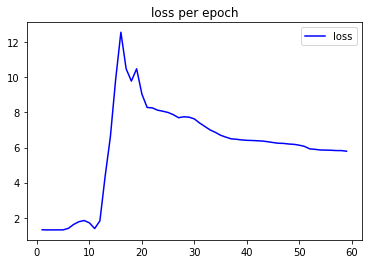

In [41]:
import matplotlib.pyplot as plt

#print(type(loss))
#print(loss[0])
#print(loss[58])
#print(loss)
#print(type(epoch))
epochs=range(1,epoch+1)
#because epoch is int, it extend dimension to match with loss (59,)  

plt.plot(epochs, loss, 'b', label='loss')
plt.title('loss per epoch')
plt.legend()
plt.show()